In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

import os
import sys
import json

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
import numpy as np

%matplotlib inline


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found

In [4]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [5]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

In [6]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure



# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [7]:
# use yaml or csv input file
use_yaml = True

In [8]:
# pick an example from given three options

case_type = 'wildcat'

case_type = 'smeaheia_v1'

# case_type = 'smeaheia_v2'

In [9]:
# where pvt located
pvt_path = '../src/WellClass/libs/pvt/pvt_constants/pure_co2'

# Examples

The following are the test examples.

In [10]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
wildcat = {
         'well_input': r'GaP_input_Wildcat_v3.csv', 
         'well_input_yaml': r'wildcat.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/wildcat', 
         'simcase': r'TEMP-0'}

In [11]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'wildcat': wildcat
}

# Load well CSV or yaml configuration file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [12]:
# the selected example for testing
case = examples[case_type]


In [13]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


In [14]:
if use_yaml:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input_yaml'])
    
    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input'])

    # load the well information
    well_csv = csv_parser(well_name)

In [15]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

## Generation of Pressure tables
### 1. Minimum input: 

The pressure class can be initialized with a minimum of the following parameters:
- Depth to seabed in mTVDMSL
- Wellbore TD in mRKB
- Wellbore RKB in mTVDMSL
- Seafloor temperature in degC. Defaulted to 4 degC
- Geothermal gradient in degC/km. Defaulted to 40 degC/km
- Fluid type: This depends on the PVT tables available on pvtpath 
  - pure CO2, Components: 100% CO2
  - pure C1, Components: 100% CH4
  - mixture 1, Components: 96% CO2, 0.4% H, 1% Ar, 0.82% N, 1.78% CH4
  - mixture 2, Components: 95% CO2, 5% CH4
- Path to the PVT tables


If depth of fluid contact is provided, by default Pressure class will calculate a pressure scenario with a hydrosatic gradient from the fluid contact to the surface

In [16]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       z_fluid_contact=well_csv['co2_datum'],
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')

Computing pressure profile for scenario: hydrostatic
self.z_MSAD=np.float64(552.0537626176261), self.p_MSAD=np.float64(73.11459497194934) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(130.01262650164696)


In [17]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,hydrostatic,True,552.053763,73.114595,1282.5,130.012627,1282.5,130.012627,0,pure_co2,100% CO2,None


If other fluid compostions want to be added and compared, the user can pick between pure CO2, mixture1, mixture2 or pure methane, or provide its own specific gravity

In [18]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')

fluid_contact = well_csv['co2_datum']
my_pressure.add_scenario(scenario_name='mixture1', fluid_type='mixture1', from_resrvr=True, z_fluid_contact=fluid_contact)
my_pressure.add_scenario(scenario_name='methane', fluid_type='methane', from_resrvr=True, z_fluid_contact=fluid_contact)
my_pressure.add_scenario(scenario_name='sg_input', fluid_type=None, from_resrvr=True, specific_gravity=300/1e3, z_fluid_contact=fluid_contact)

my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: mixture1
self.z_MSAD=np.float64(569.8856105911377), self.p_MSAD=np.float64(76.13709320345956) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(130.01262650164696)
Computing pressure profile for scenario: methane
self.z_MSAD=np.float64(863.9134993579333), self.p_MSAD=np.float64(125.97482034943141) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(130.01262650164696)
Computing pressure profile for scenario: sg_input
self.z_MSAD=np.float64(804.8259435828675), self.p_MSAD=np.float64(115.95947964555775) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(130.01262650164696)


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,mixture1,True,569.885611,76.137093,1282.5,130.012627,1282.5,130.012627,0,mixture1,"96% CO2, 0.4% H, 1% Ar, 0.82% N, 1.78% CH4",NaN
1,methane,True,863.913499,125.974820,1282.5,130.012627,1282.5,130.012627,0,methane,100% CH4,NaN
2,sg_input,True,804.825944,115.959480,1282.5,130.012627,1282.5,130.012627,0,None,None,0.3


If simple input scenarios are provided in the input_scenarios argument, these will be computed

In [19]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       input_scenarios=well_csv['reservoir_pressure'],
                       z_fluid_contact=well_csv['co2_datum'],
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')

my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: RP1
self.z_MSAD=np.float64(552.0537626176261), self.p_MSAD=np.float64(73.11459497194934) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(130.01262650164696)
p_delta=91.0
Computing pressure profile for scenario: RP2
self.z_MSAD=np.float64(1555.029476830306), self.p_MSAD=np.float64(243.11897853099856) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(221.01262650164696)
p_delta=20.0
Computing pressure profile for scenario: RP3
self.z_MSAD=np.float64(764.0809563346128), self.p_MSAD=np.float64(109.05320430697859) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(150.01262650164696)


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,RP1,True,552.053763,73.114595,1282.5,130.012627,1282.5,130.012627,0.0,pure_co2,100% CO2,None
1,RP2,True,NaN,NaN,1282.5,221.012627,1282.5,221.012627,91.0,pure_co2,100% CO2,None
2,RP3,True,764.080956,109.053204,1282.5,150.012627,1282.5,150.012627,20.0,pure_co2,100% CO2,None


### 2. Create a pressure scenario

Create a pressure scenario providing only the **MSAD** (the `from_resrv` flag has to be False )

In [20]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       default_hs_scenario=False,
                    #    z_fluid_contact=1300,
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')

my_pressure.add_scenario(scenario_name='plug', from_resrvr=False, z_MSAD = 500, z_fluid_contact = 1300)



Computing pressure profile for scenario: plug
Lines do not intersect


In [21]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,plug,False,500,64.291482,1300,126.145786,1300,126.145786,-5.618736,pure_co2,100% CO2,None


Create a pressure scenario providing only the **delta Pressure +/-** and depth **fluid_contact**. The code assumes the reservoir depth is the same as the `co2_datum` (the `from_resrv` flag has to be True )

In [22]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       default_hs_scenario=False,
                    #    z_fluid_contact=1300,
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                     #   shmin_gradient=0.1855
                       )

my_pressure.add_scenario(scenario_name='test1', from_resrvr=True, p_delta = 25, z_fluid_contact = my_well.co2_datum)

my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: test1
self.z_MSAD=np.float64(818.2200320397768), self.p_MSAD=np.float64(118.22977763900387) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(155.01262650164696)


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,test1,True,818.220032,118.229778,1282.5,155.012627,1282.5,155.012627,25,pure_co2,100% CO2,None


In [23]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       default_hs_scenario=False,
                    #    z_fluid_contact=1300,
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       shmin_gradient=0.1855
                       )

my_pressure.add_scenario(scenario_name='test1', from_resrvr=True, p_delta = 25, z_fluid_contact = my_well.co2_datum)

my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: test1
self.z_MSAD=np.float64(738.5055482375989), self.p_MSAD=np.float64(111.54226140633628) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(155.01262650164696)


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,test1,True,738.505548,111.542261,1282.5,155.012627,1282.5,155.012627,25,pure_co2,100% CO2,None


Create a pressure scenario providing only the **delta Pressure +/-** at reservoir and the reservoir depth (the `from_resrv` flag has to be True )

In [24]:
my_pressure.add_scenario(scenario_name='test2', from_resrvr=True, p_delta = 10, z_resrv=1180, z_fluid_contact = my_well.co2_datum)

my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: test2
self.z_MSAD=np.float64(602.1089739729334), self.p_MSAD=np.float64(86.24069688024085) , self.z_fluid_contact=1282.5, self.p_fluid_contact=np.float64(140.01262650164696)


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,test1,True,738.505548,111.542261,1282.5,155.012627,1282.5,155.012627,25,pure_co2,100% CO2,None
1,test2,True,602.108974,86.240697,1180.0,132.477676,1282.5,140.012627,10,pure_co2,100% CO2,None


Create a pressure scenario providing a pressure measurement (value) and its correspoinding depth (the `from_resrv` flag has to be True )

In [25]:
my_pressure.add_scenario(scenario_name='test3', from_resrvr=True, z_resrv=1100, p_resrv=200)

my_pressure.scenario_manager.get_scenarios_summary()


Computing pressure profile for scenario: test3
self.z_fluid_contact=None
self.z_MSAD=np.float64(1309.3705779699794), self.p_MSAD=np.float64(217.4377244216929) , self.z_fluid_contact=1100, self.p_fluid_contact=200


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,test1,True,738.505548,111.542261,1282.5,155.012627,1282.5,155.012627,25.000000,pure_co2,100% CO2,None
1,test2,True,602.108974,86.240697,1180.0,132.477676,1282.5,140.012627,10.000000,pure_co2,100% CO2,None
2,test3,True,NaN,NaN,1100.0,200.000000,1100.0,200.000000,88.280409,pure_co2,100% CO2,None


In [26]:
my_pressure.scenario_manager.scenarios['test3'].init_curves

,depth,temperature,hydrostatic_pressure,min_horizontal_stress,fluid_pressure,brine_pressure
0,0.0,4.00,1.013250,1.013250,99.718773,88.848315
1,1.0,4.00,1.113848,1.113848,99.812273,88.949342
2,2.0,4.00,1.214446,1.214446,99.905785,89.050369
3,3.0,4.00,1.315045,1.315045,99.999309,89.151397
4,4.0,4.00,1.415644,1.415644,100.092844,89.252425
...,...,...,...,...,...,...
3657,3657.0,137.80,362.425614,652.922982,NaN,451.620944
3658,3658.0,137.84,362.520693,653.108482,NaN,451.716200
3659,3659.0,137.88,362.615771,653.293982,NaN,451.811453
3660,3660.0,137.92,362.710845,653.479482,NaN,451.906702


# Visualization

739.0 (544,) 738.5055482375989
603.0 (680,) 602.1089739729334
0.0 (1101,) nan


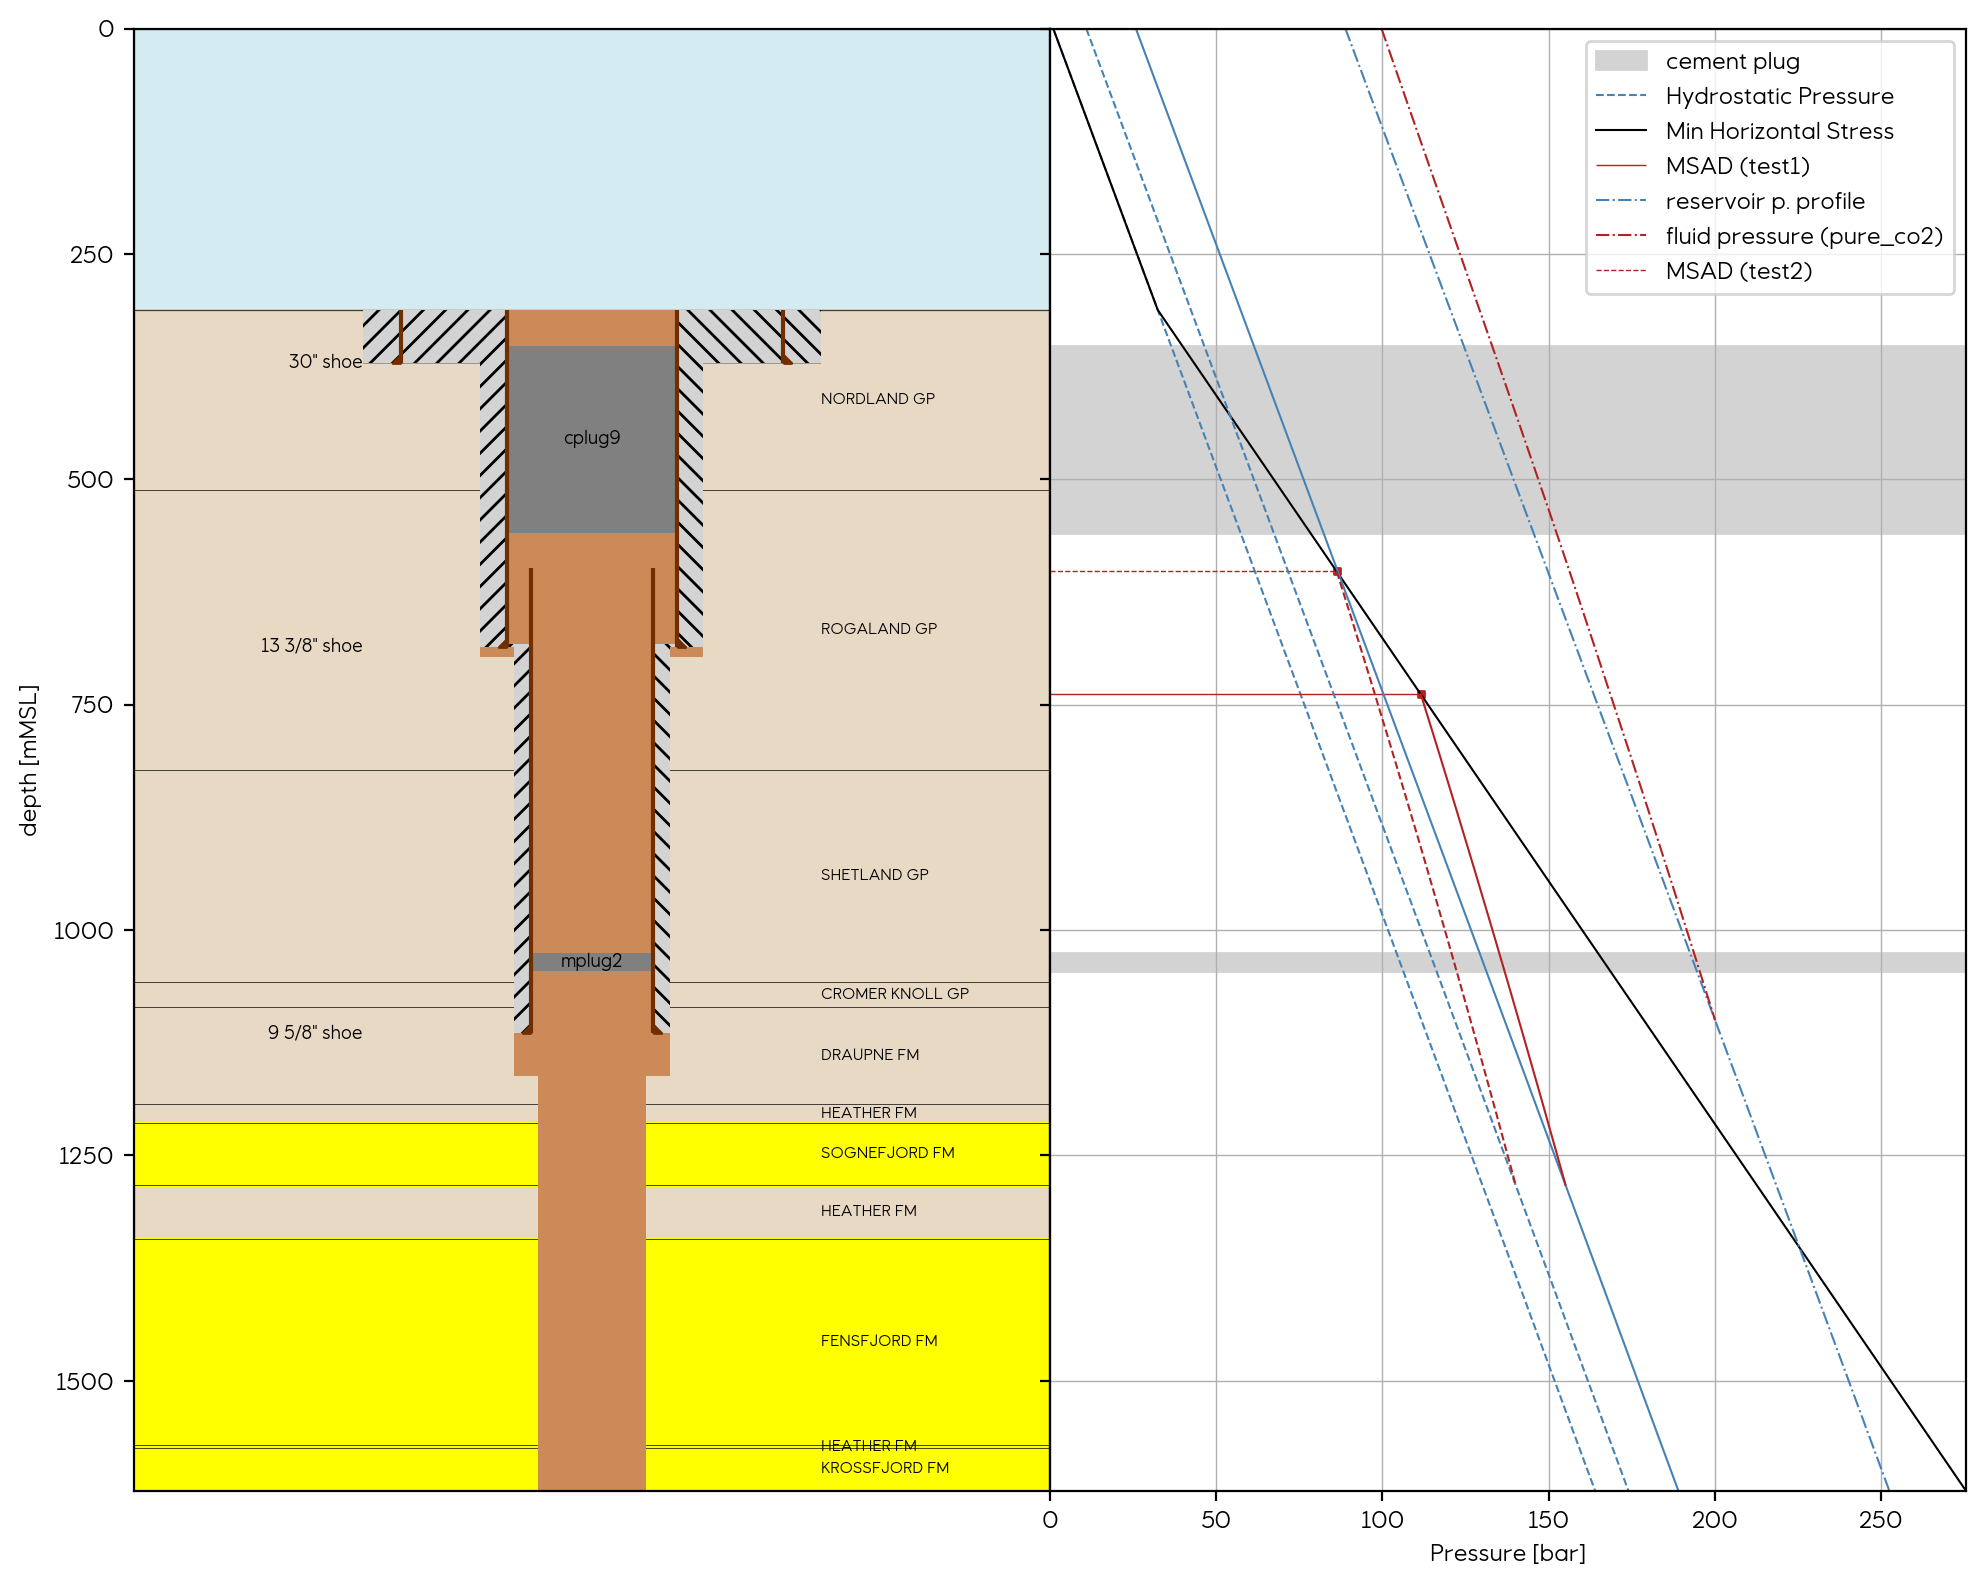

In [30]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )




fig.tight_layout()
fig.subplots_adjust(wspace=0)


In [31]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,test1,True,738.505548,111.542261,1282.5,155.012627,1282.5,155.012627,25.000000,pure_co2,100% CO2,None
1,test2,True,602.108974,86.240697,1180.0,132.477676,1282.5,140.012627,10.000000,pure_co2,100% CO2,None
2,test3,True,NaN,NaN,1100.0,200.000000,1100.0,200.000000,88.280409,pure_co2,100% CO2,None


739.0 (544,) 738.5055482375989
603.0 (680,) 602.1089739729334
0.0 (1101,) nan


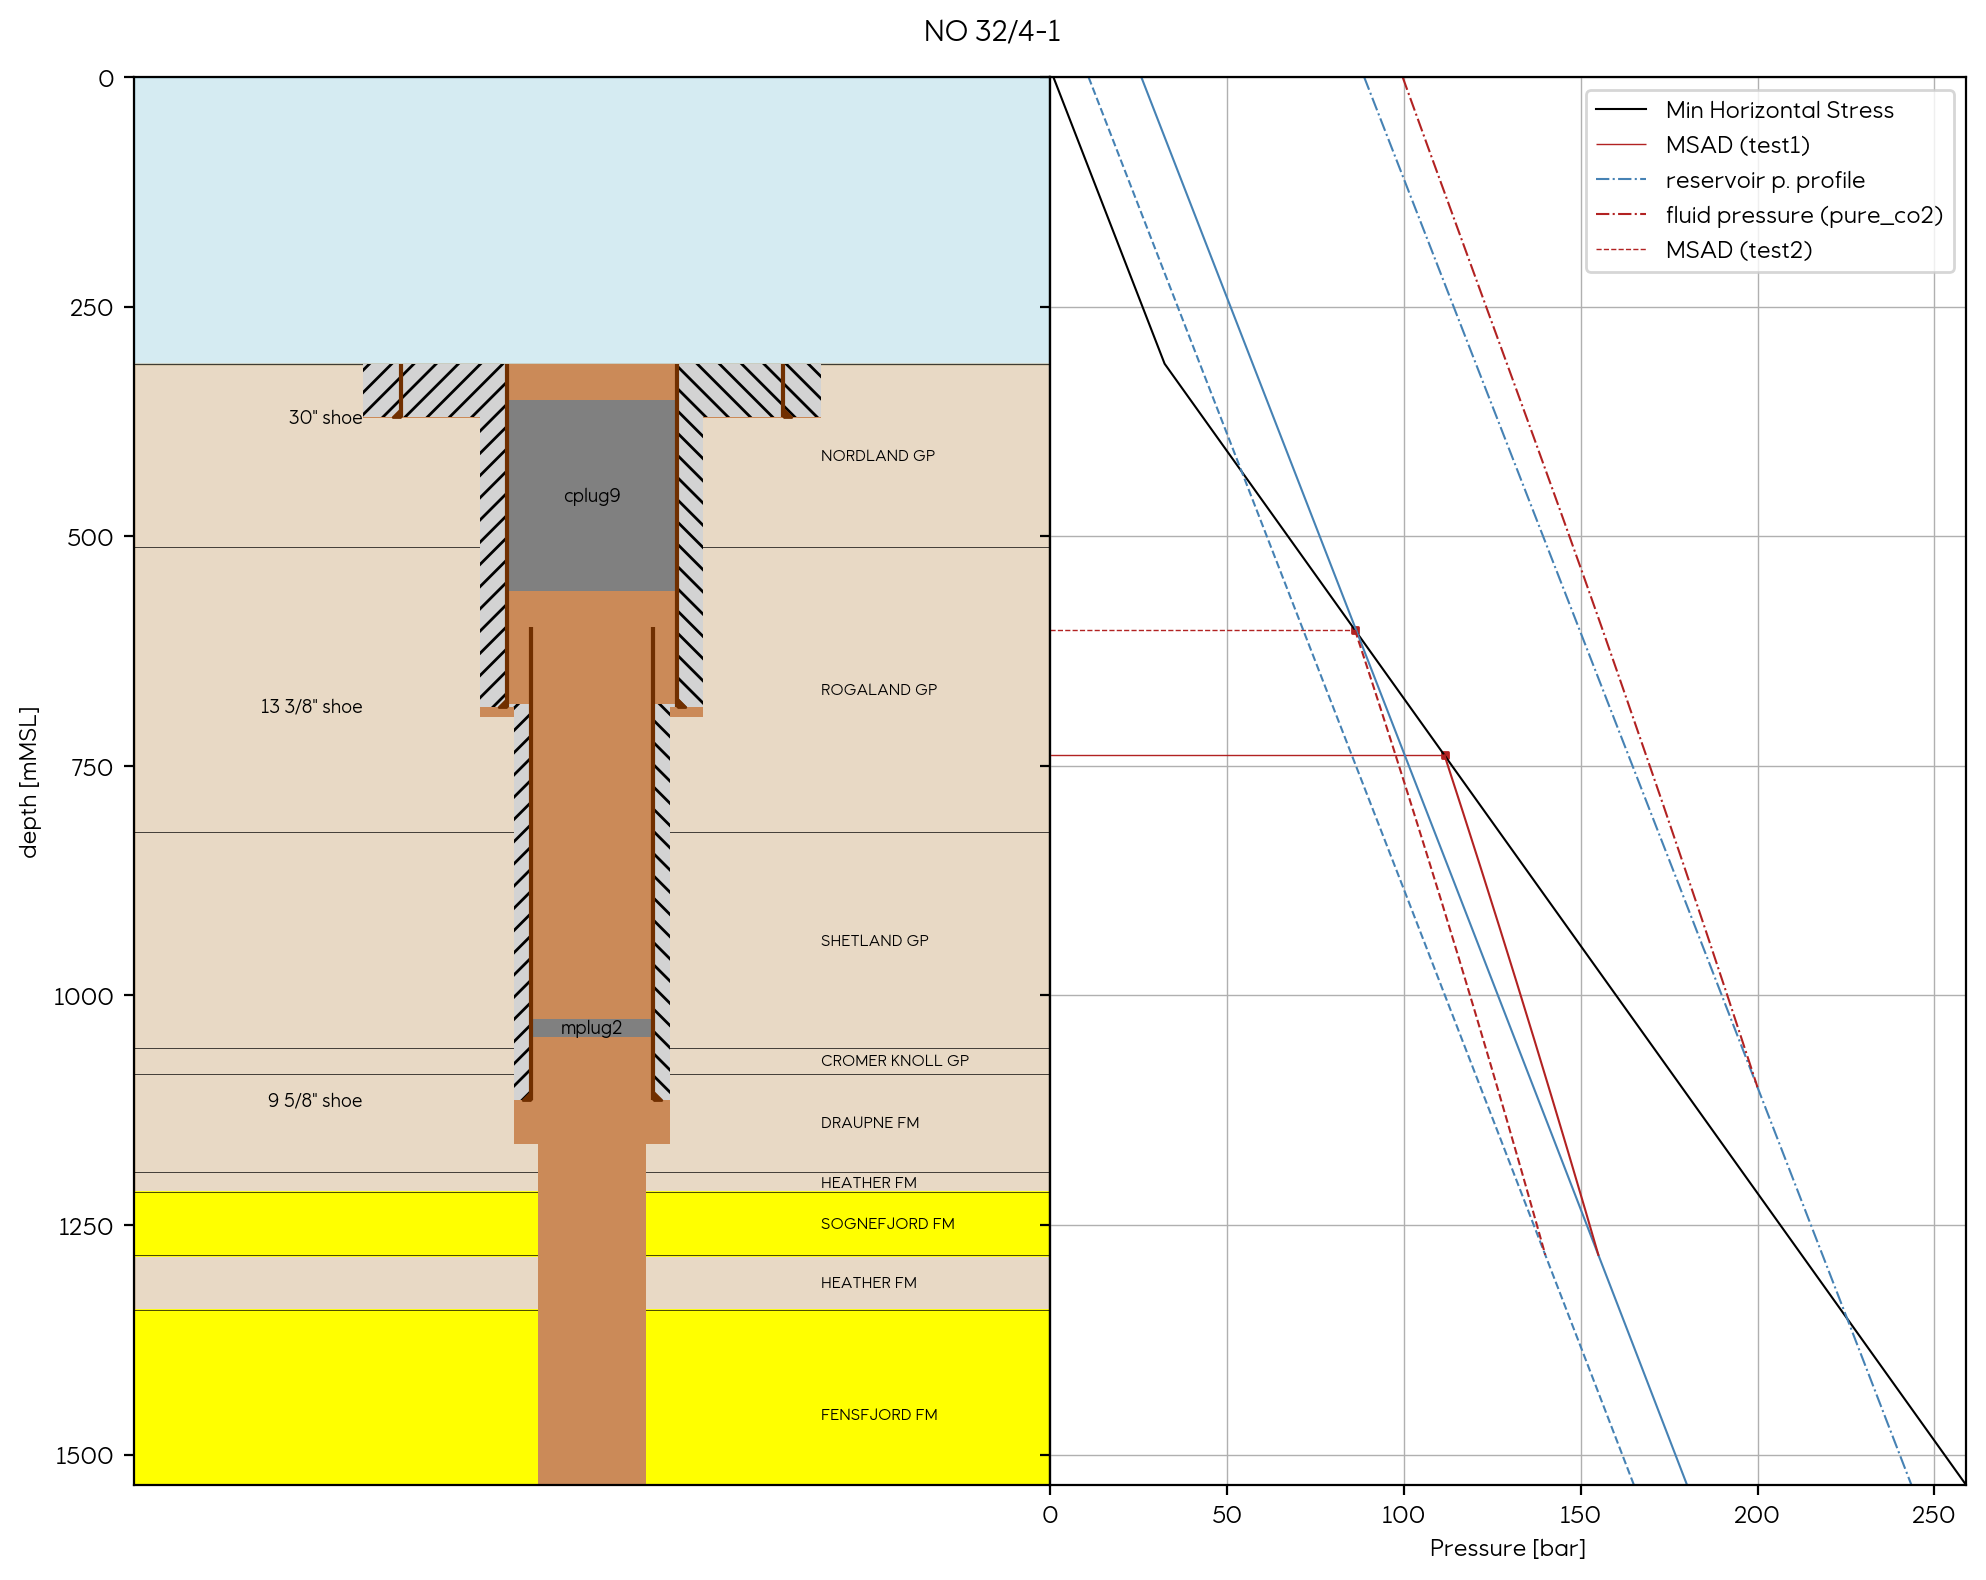

In [ ]:
from src.WellClass.libs.plotting import plot_onepager

fig, ax1, ax2 = plot_onepager( my_well, my_pressure, plot_MSAD=True)



# CO2 Leakage

In [35]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

'cplug9'

In [36]:
my_well.barrier_perm

{'quality': ['good', 'mid', 'poor'], 'kv': [0.01, 10, 1000.0]}

In [37]:
my_pressure.compute_barrier_leakage(well=my_well, barrier_name=main_barrier)

,p_brine_above_barrier,p_fluid_below_barrier,rho_brine_below_barrier,rho_fluid_below_barrier,0.01,10,1000.0
test1,35.511435,93.236447,1001.638398,890.570311,0.0,0.02256,2.26756
test2,35.511435,79.75436,1001.638398,876.17954,0.0,0.01758,1.76903
test3,35.511435,152.344035,1001.638398,936.756133,0.0,0.04455,4.46625
